In [1]:
import os
import pandas as pd

In [3]:
wines=pd.read_csv("WineQT.csv")
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [5]:
wines.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,False,False,False,False,False,False,False,False,False,False,False,False,False
1139,False,False,False,False,False,False,False,False,False,False,False,False,False
1140,False,False,False,False,False,False,False,False,False,False,False,False,False
1141,False,False,False,False,False,False,False,False,False,False,False,False,False


AttributeError: module 'matplotlib' has no attribute 'show'

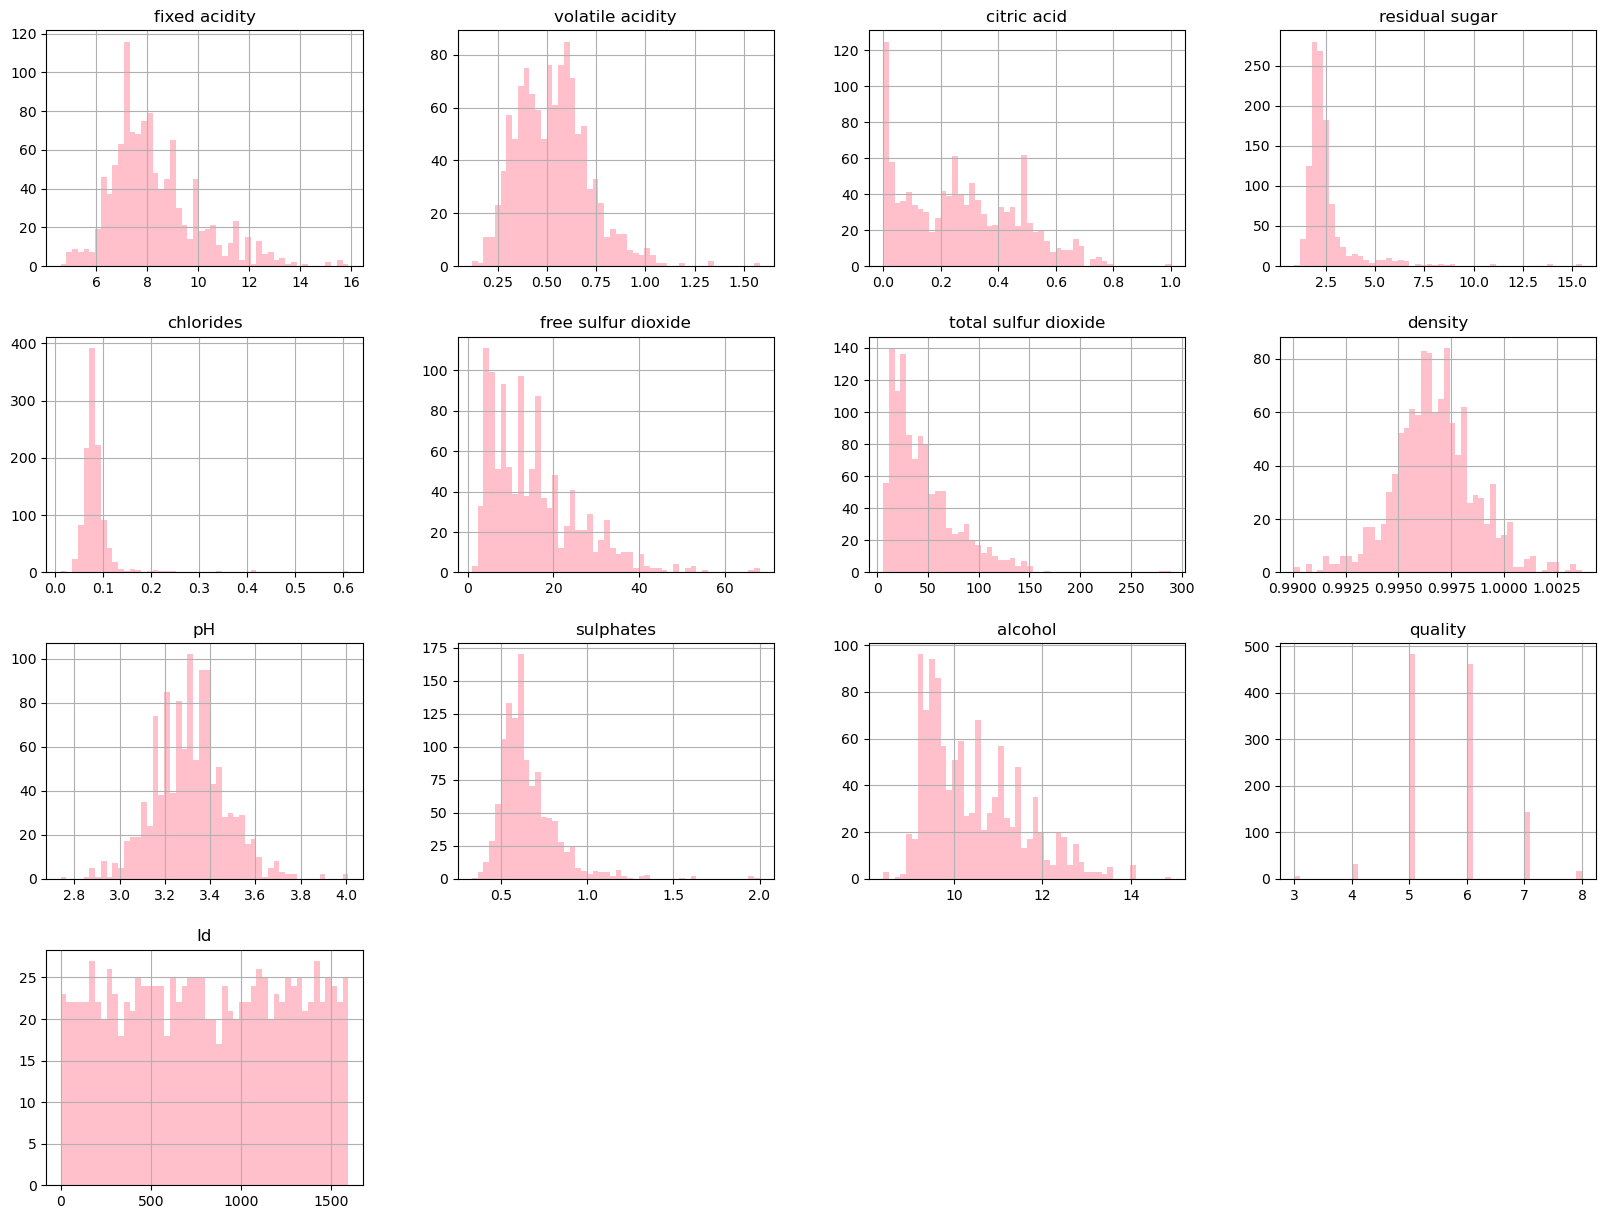

In [8]:
import matplotlib as plt
wines.hist(bins=50,figsize=(20,15),color="pink")
plt.show()

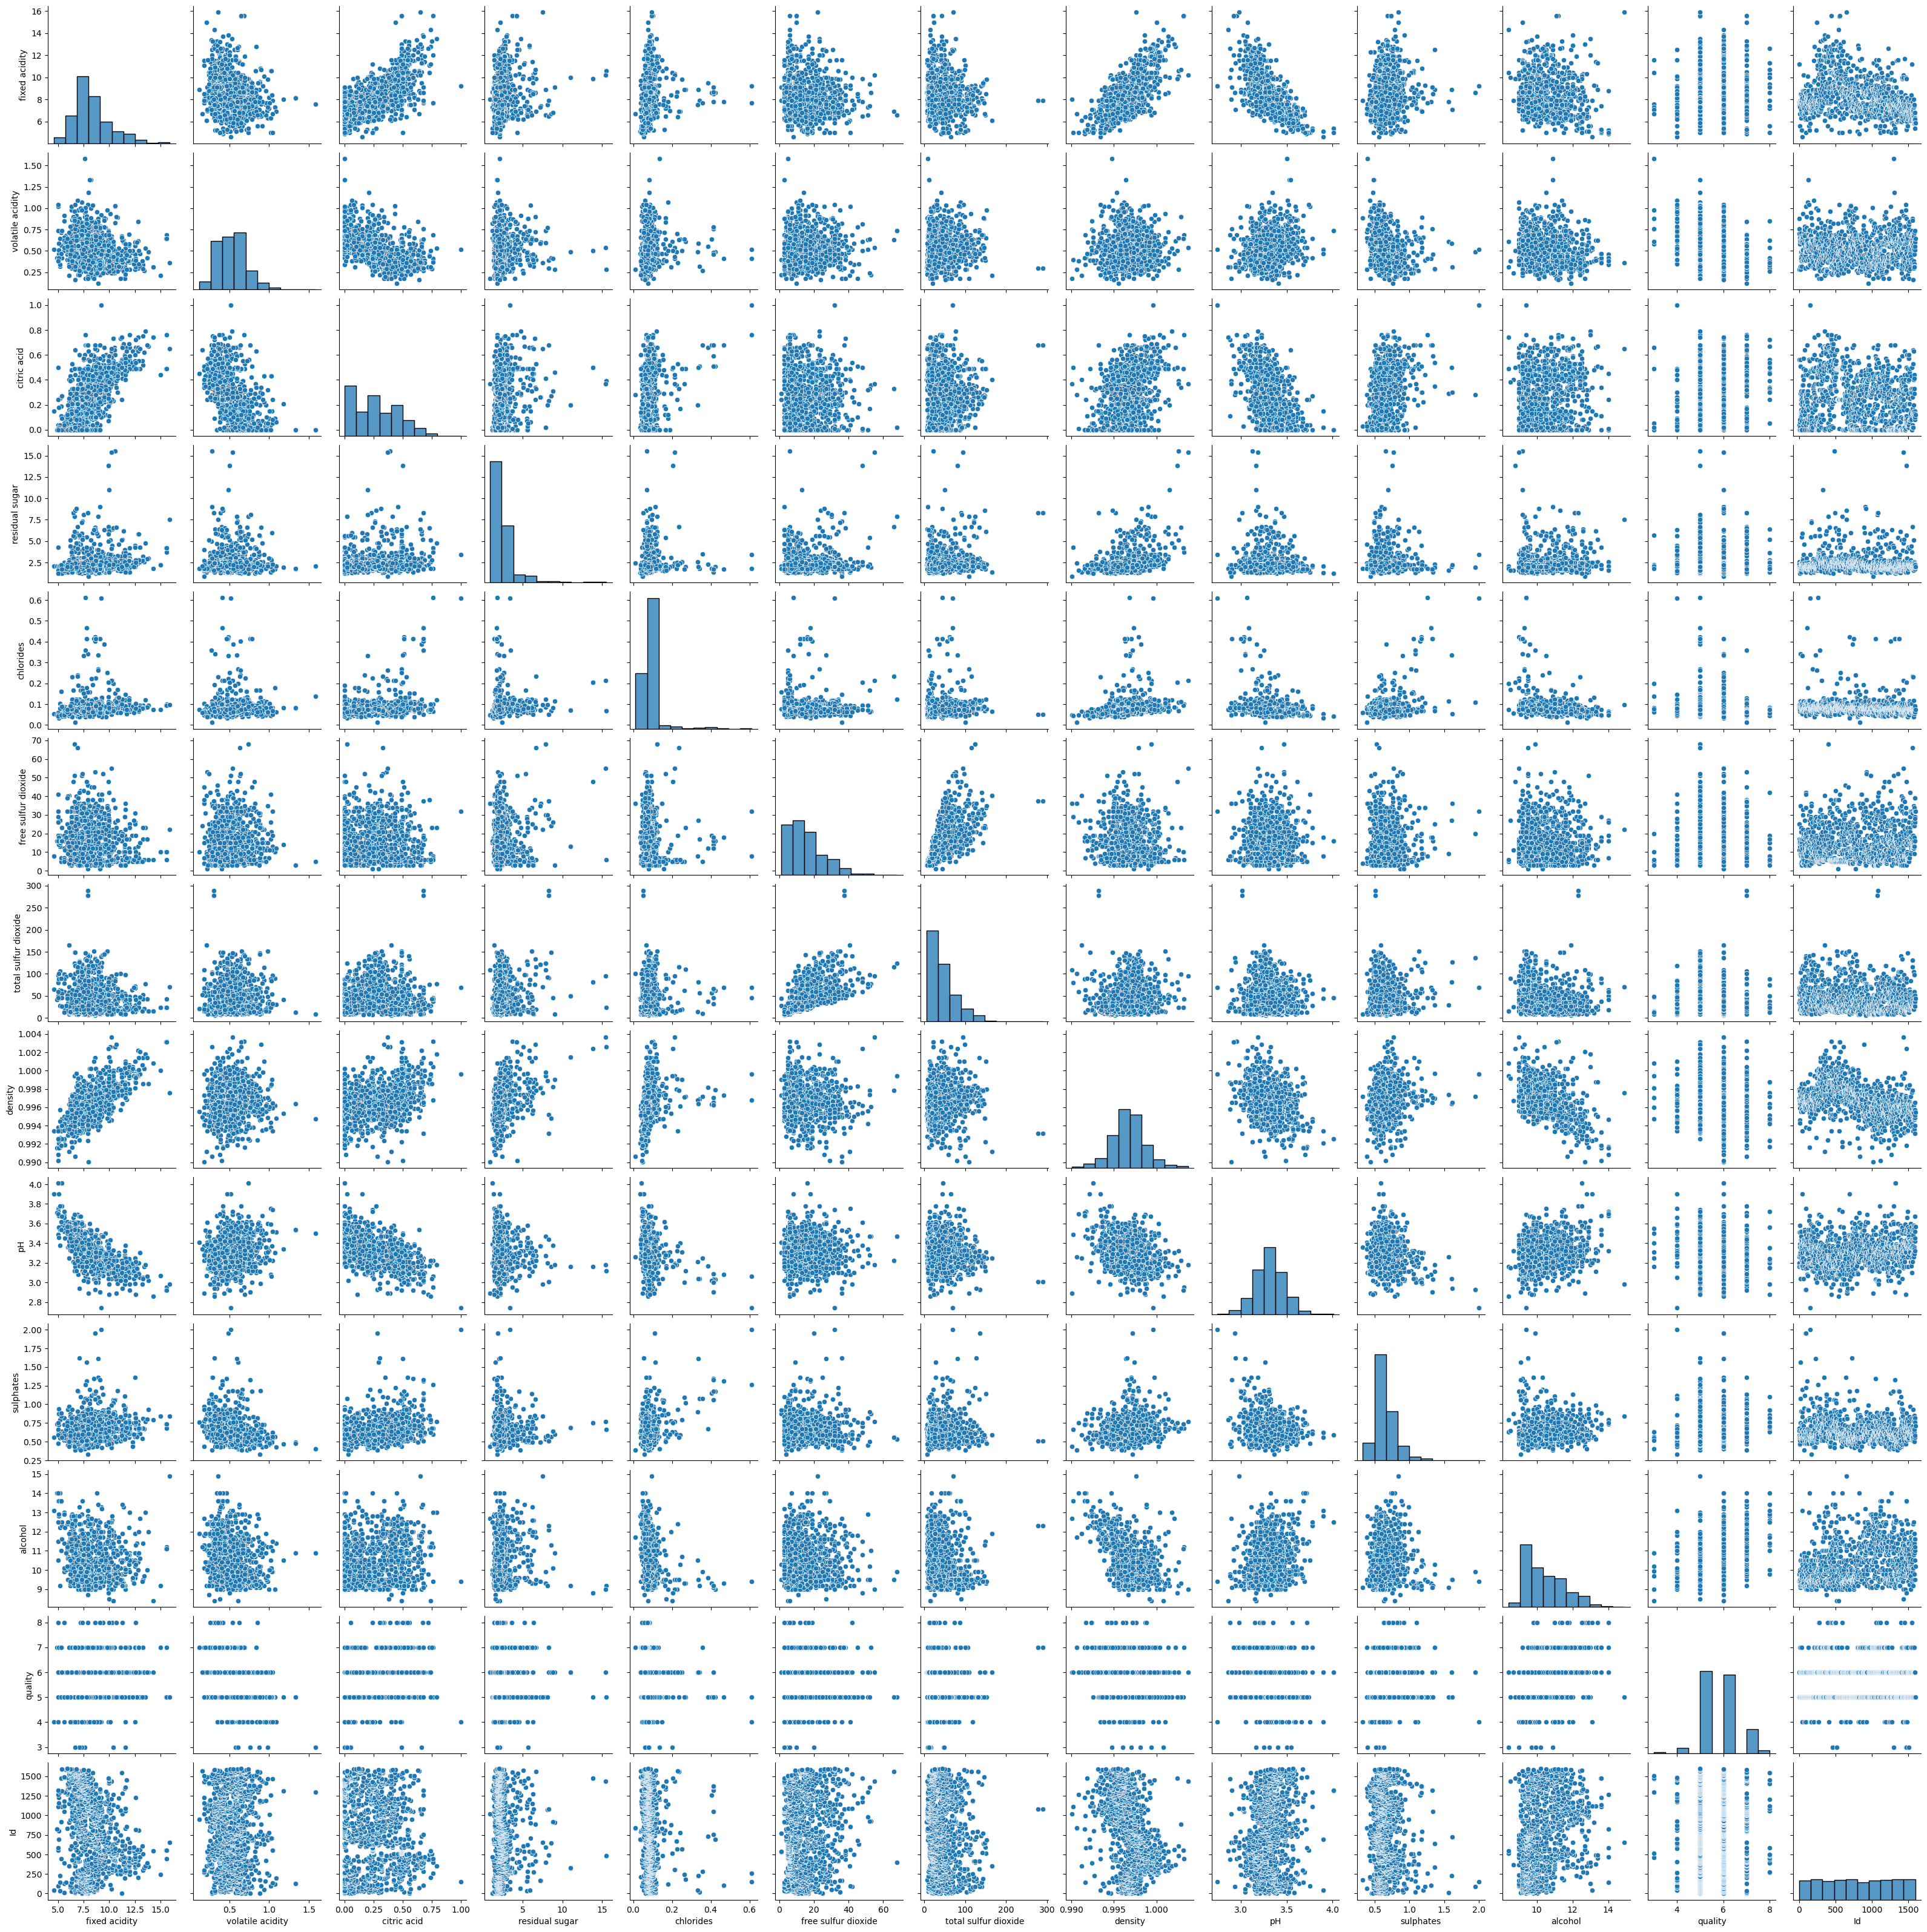

In [9]:
import seaborn as sns
sns.pairplot(wines, diag_kws={'bins': 10})

In [10]:
X=wines.drop(['quality'],axis=1)
y=wines['quality']

In [11]:
X
y

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64

In [14]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(914, 12)
(229, 12)
(229,)
(914,)


In [16]:
from sklearn.linear_model import ElasticNet
lr=ElasticNet(alpha=0.1, l1_ratio=0.5,random_state=42)
lr.fit(X_train,y_train)

ElasticNet(alpha=0.1, random_state=42)

In [17]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import numpy as np

In [18]:
def eval_metrics(actual,pred):
    rmse=np.sqrt(mean_squared_error(actual,pred))
    mae=mean_absolute_error(actual,pred)
    r2=r2_score(actual,pred)
    return rmse,mae,r2

In [20]:
predicted_value=lr.predict(X_test)
predicted_value

array([5.41827018, 5.11124249, 5.47220991, 5.27146275, 6.35194597,
       6.49994323, 5.41305884, 5.19195673, 5.70485351, 5.3980524 ,
       6.27045638, 5.92748989, 5.74737186, 6.14964586, 5.85425439,
       5.56051331, 5.5014995 , 5.67549416, 5.42078388, 6.20175259,
       5.74908949, 5.88520389, 5.21947575, 6.15249646, 5.6468529 ,
       5.41428448, 6.3145176 , 5.86278447, 5.35666361, 5.57796355,
       6.39874219, 5.54267933, 6.4496524 , 5.67001657, 5.75237299,
       5.26007007, 5.67783963, 5.80701407, 6.5990968 , 5.14814451,
       5.98899061, 5.67122952, 6.68134479, 5.48775059, 5.42112696,
       5.37167409, 5.91657362, 5.90908389, 5.1220525 , 5.88900446,
       6.21305379, 5.61952411, 5.61123571, 5.699142  , 5.51902632,
       6.23358344, 5.74317845, 5.75628747, 5.51127107, 5.42736815,
       5.51287797, 5.98921461, 5.72192076, 5.9337469 , 6.02348539,
       5.59003484, 6.52929783, 5.21137133, 5.18590923, 5.97240397,
       5.34815543, 5.36882586, 5.31793627, 6.19542595, 5.55907

In [21]:
(rmse,mae,r2)=eval_metrics(y_test,predicted_value)

In [22]:
print("rmse = ",rmse)
print("mae= ",mae)
print("r2 = ",r2)


rmse =  0.629995959330732
mae=  0.5034416470825984
r2 =  0.2867669826959264
